<h2>“Top 50 Combination Frequency Selection”<h2>



<ul>
  <li>Count the Frequency: Determine how often each combination of answers appears.</li>
  <li>Rank the Combinations: Sort the combinations based on their frequency.</li>
  <li>Select the Top 50: Choose the top 50 combinations with the highest counts.</li>
</ul>

Displays the *increasing correlation* of ***family history of mental health to mental health treatment*** from the top 50 percent combination frequency selection:  Also shown is the negative correlation of the same two factors(family_history and treatment) in the bottom 50 percent of the same data set

> *code used to refine ranking*
>count = refined_df_2.groupby(list(refined_df_2.columns)).size().reset_index(name='count')
>
>total_rows = len(refined_df_2)
>
>count['percentage'] = (count['count'] / total_rows) * 100
>
>common_count = count.sort_values(by='percentage', ascending=False)
>
>common_count.tail(10)

In [664]:
#dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [665]:
#data import
data = pd.read_csv('df_factors.csv')

#pd.read_csv('top_10_percent_answers.csv')
#pd.read_csv('top_50_percent_answers.csv')

In [666]:
#sns.scatterplot(data=data, x="mental_health_severity", y="candidacy_rating", hue="occupation")

In [667]:
#refine data by distribution analysis
# drop columns that do not have a normal distribution
# drop columns

refined_df = data.drop(columns=['gender', 'country', 'self_employed', 'mental_health_interview'])

# Display the first few rows of the refined DataFrame to confirm the changes
refined_df.head()

,occupation,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,care_options,mental_health_severity,candidacy_rating
0,Corporate,1,1,1-14 days,1,-1,1,0,-1,1,1,Yes,1,3
1,Corporate,1,1,1-14 days,1,-1,1,0,-1,1,1,Yes,1,3
2,Corporate,-1,1,1-14 days,1,-1,1,0,-1,1,1,Not sure,1,1
3,Corporate,1,1,1-14 days,1,-1,1,0,-1,1,1,Not sure,1,3
4,Corporate,-1,-1,1-14 days,1,-1,1,0,-1,1,1,No,1,-1


*see data proportions for remaining columns: occupation	family_history	treatment	days_indoors*

In [668]:

# growing_stress	changes_habits	mental_health_history	mood_swings	coping_struggles	
# work_interest	social_weakness	care_options	mental_health_severity	candidacy_rating
print(refined_df['occupation'].value_counts(normalize=True))
print(refined_df['family_history'].value_counts(normalize=True))
print(refined_df['treatment'].value_counts(normalize=True))
print(refined_df['days_indoors'].value_counts(normalize=True))
print(refined_df['growing_stress'].value_counts(normalize=True))
print(refined_df['changes_habits'].value_counts(normalize=True))
print(refined_df['mental_health_history'].value_counts(normalize=True))
print(refined_df['mood_swings'].value_counts(normalize=True))
print(refined_df['coping_struggles'].value_counts(normalize=True))
print(refined_df['work_interest'].value_counts(normalize=True))
print(refined_df['social_weakness'].value_counts(normalize=True))
print(refined_df['care_options'].value_counts(normalize=True))
print(refined_df['mental_health_severity'].value_counts(normalize=True))
print(refined_df['candidacy_rating'].value_counts(normalize=True))

#because i do not know what the strongest indicator of mental health is i will continue to refind by 
#dropping columns that are not evenly distributed (care options and changes in habits)


occupation
Housewife    0.226956
Student      0.211334
Corporate    0.209488
Others       0.180710
Business     0.171513
Name: proportion, dtype: float64
family_history
-1    0.604774
 1    0.395226
Name: proportion, dtype: float64
treatment
 1    0.50405
-1    0.49595
Name: proportion, dtype: float64
days_indoors
1-14 days             0.217400
31-60 days            0.207635
Go out Every day      0.199619
More than 2 months    0.191244
15-30 days            0.184102
Name: proportion, dtype: float64
growing_stress
 0    0.342054
 1    0.340762
-1    0.317183
Name: proportion, dtype: float64
changes_habits
 1    0.374628
 0    0.325506
-1    0.299866
Name: proportion, dtype: float64
mental_health_history
-1    0.355824
 0    0.326171
 1    0.318005
Name: proportion, dtype: float64
mood_swings
 0    0.345700
-1    0.341487
 1    0.312813
Name: proportion, dtype: float64
coping_struggles
-1    0.527956
 1    0.472044
Name: proportion, dtype: float64
work_interest
 1    0.362040
 0    0.346

### additional data clean up

*dropping columns that are not evenly distributed (care options and changes in habits)*<br>
*dropping columns that were created features*

In [669]:

#because i do not know what the strongest indicator of mental health is i will continue to refind by 
#dropping columns that are not evenly distributed (care options and changes in habits)
#remove added features

refined_df_2 = refined_df.drop(columns=['care_options', 'changes_habits', 'mental_health_severity', 'candidacy_rating'])

In [670]:

# variance = data.var(numeric_only=True)
# print(variance)

In [671]:
#commonality function

#count the number of matched columns to find commonality

count = refined_df_2.groupby(list(refined_df_2.columns)).size().reset_index(name='count')

total_rows = len(refined_df_2)

count['percentage'] = (count['count'] / total_rows) * 100

common_count = count.sort_values(by='percentage', ascending=False)

common_count.head(30)

,occupation,family_history,treatment,days_indoors,growing_stress,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,count,percentage
1207,Housewife,-1,-1,1-14 days,0,0,-1,-1,-1,-1,522,0.181779
1744,Housewife,1,1,1-14 days,0,0,-1,-1,-1,-1,298,0.103774
2016,Others,-1,-1,Go out Every day,0,1,1,1,-1,-1,285,0.099247
2569,Student,-1,-1,31-60 days,-1,1,-1,-1,1,0,285,0.099247
2627,Student,-1,-1,Go out Every day,1,-1,1,-1,1,-1,285,0.099247
646,Corporate,-1,-1,31-60 days,0,-1,0,-1,-1,1,285,0.099247
2651,Student,-1,-1,More than 2 months,0,-1,0,1,1,-1,285,0.099247
663,Corporate,-1,-1,31-60 days,1,0,1,-1,-1,0,285,0.099247
664,Corporate,-1,-1,31-60 days,1,1,-1,-1,-1,1,285,0.099247
2536,Student,-1,-1,15-30 days,-1,0,-1,-1,0,1,285,0.099247


## statistical testing for data integrity

**chi-squared** and **p-values**

In [672]:
#look for correlation between variables
from itertools import combinations
from scipy.stats import chi2_contingency

# # Generate all pairs of variables
# variable_pairs = list(combinations(df_main.columns, 2))
# for var1, var2 in variable_pairs:
#     contingency_table = pd.crosstab(df_main[var1], df_main[var2])
#     print(f"Contingency Table for {var1} and {var2}:\n{contingency_table}\n")


# Generate all pairs of variables
variable_pairs = list(combinations(data.columns, 2))

# Perform Chi-Square test for each pair and store the results
chi_square_results = []

for var1, var2 in variable_pairs:
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi_square_results.append({'Variable Pair': f'{var1} - {var2}', 'Chi2': chi2, 'p-value': p})

# Convert results to DataFrame
chi_square_results_df = pd.DataFrame(chi_square_results)

# Sort by p-value
chi_square_results_df = chi_square_results_df.sort_values(by='p-value')


#save results to csv
#chi_square_results_df.to_csv('chi_square_results.csv')


#take top 100 results
chi_square_top_df = chi_square_results_df.head(100)

#sort by chi2
chi_square_sorted_df = chi_square_top_df.sort_values(by='Chi2', ascending=False)

# Display the results
chi_square_sorted_df.head(10)   

,Variable Pair,Chi2,p-value
86,treatment - candidacy_rating,120177.266559,0.0
74,family_history - candidacy_rating,119290.784906,0.0
136,coping_struggles - mental_health_severity,96813.975552,0.0
145,social_weakness - mental_health_severity,78954.209095,0.0
141,work_interest - mental_health_severity,75924.236664,0.0
130,mood_swings - mental_health_severity,61744.326226,0.0
107,growing_stress - candidacy_rating,59473.877324,0.0
124,mental_health_history - candidacy_rating,51394.508831,0.0
116,changes_habits - candidacy_rating,49864.236230,0.0
29,country - mental_health_interview,43059.266825,0.0


Numeric DataFrame:
   family_history  treatment  growing_stress  changes_habits  \
0               1          1               1              -1   
1               1          1               1              -1   
2              -1          1               1              -1   
3               1          1               1              -1   
4              -1         -1               1              -1   

   mental_health_history  mood_swings  coping_struggles  work_interest  \
0                      1            0                -1              1   
1                      1            0                -1              1   
2                      1            0                -1              1   
3                      1            0                -1              1   
4                      1            0                -1              1   

   social_weakness  mental_health_severity  candidacy_rating  
0                1                       1                 3  
1                1       

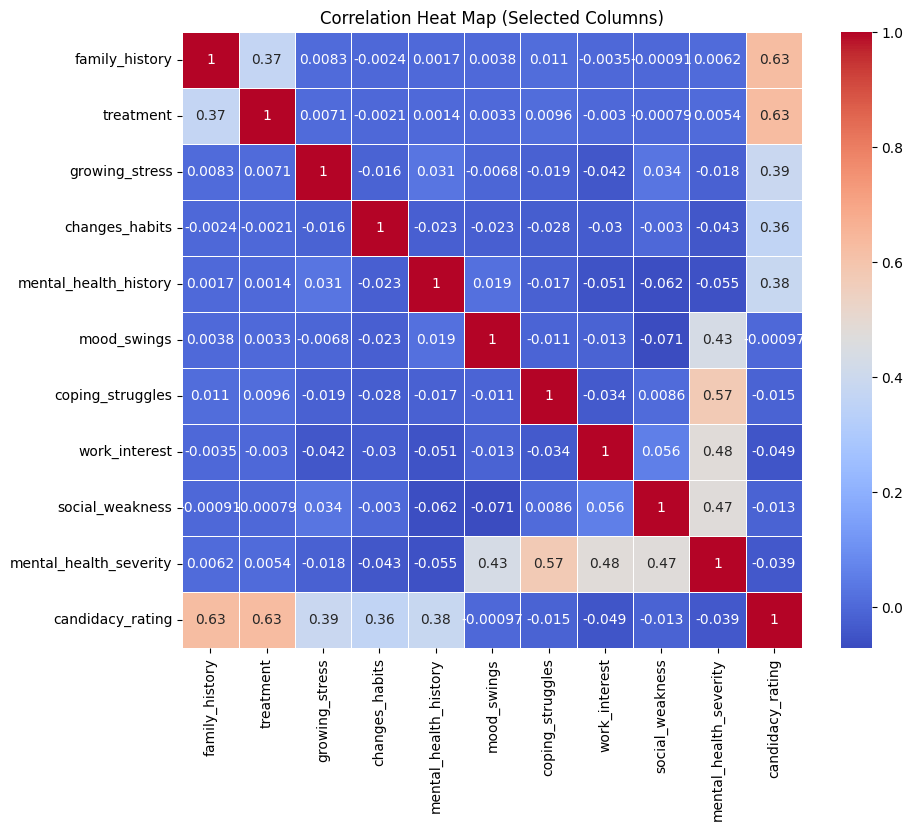

In [673]:
# Create a copy of the DataFrame
df_cor = data.copy()

# Remove non-numeric columns
df_cor = df_cor.select_dtypes(include=[float, int])

# Display the first few rows of the numeric DataFrame
print("Numeric DataFrame:")
print(df_cor.head())

# Calculate the correlation matrix
correlation_matrix = df_cor.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map (Selected Columns)')
plt.show()

In [674]:
#get p values of family history and treatment
contingency_table = pd.crosstab(data['family_history'], data['treatment'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")






Chi-Square Statistic: 39624.74171866115
p-value: 0.0


Numeric DataFrame:
   family_history  treatment  growing_stress  mental_health_history  \
0               1          1               1                      1   
1               1          1               1                      1   
2              -1          1               1                      1   
3               1          1               1                      1   
4              -1         -1               1                      1   

   mood_swings  coping_struggles  work_interest  social_weakness  
0            0                -1              1                1  
1            0                -1              1                1  
2            0                -1              1                1  
3            0                -1              1                1  
4            0                -1              1                1  

Correlation Matrix:
                       family_history  treatment  growing_stress  \
family_history               1.000000   0.371474        0.00827

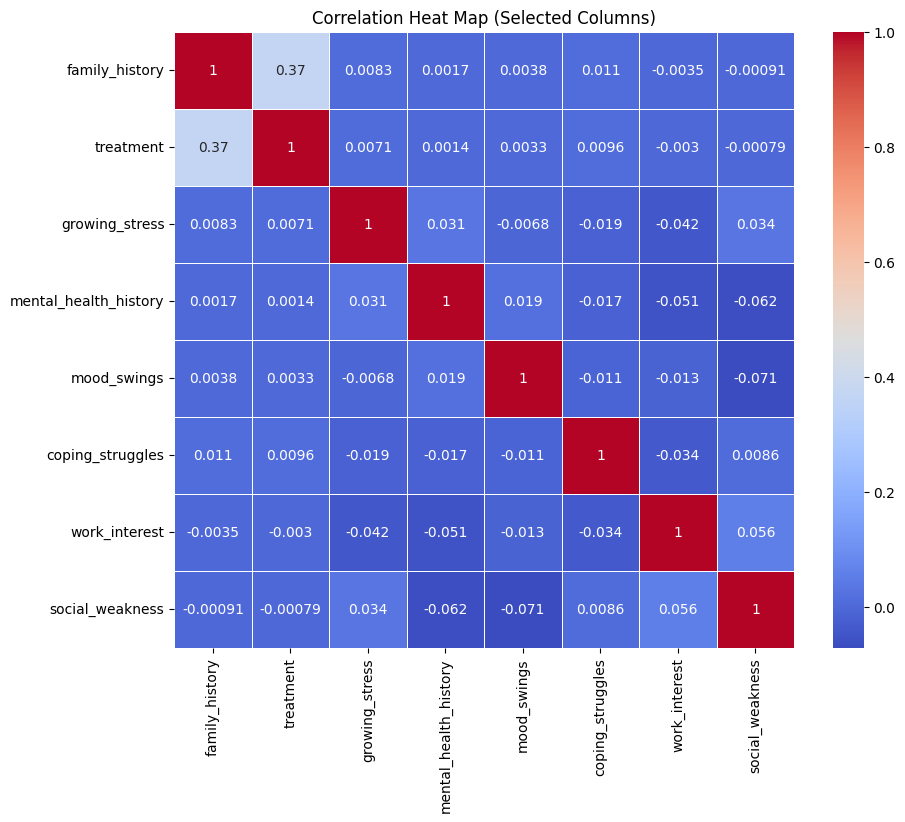

In [675]:
df_cor = refined_df_2.copy()

# Remove non-numeric columns
df_cor = df_cor.select_dtypes(include=[float, int])

# Display the first few rows of the numeric DataFrame
print("Numeric DataFrame:")
print(df_cor.head())

# Calculate the correlation matrix
correlation_matrix = df_cor.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map (Selected Columns)')
plt.show()

### RESULTS of
### entire new data frame with manipulation and clean up

>Chi-Square Statistic: 39624.74171866115 *and*
>p-value: 0.0
>
># family history and treatment correlation
>
># 0.37



# Next Section
# top 10 percent of data
# vvv

In [676]:
#take a look at the top 10 percentage of commonality
# Sort the DataFrame by the 'percentage' column in descending order
common_count = common_count.sort_values(by='percentage', ascending=False)

# Calculate the cumulative sum of the 'percentage' column
common_count['cumulative_percentage'] = common_count['percentage'].cumsum()

# Identify the rows until the cumulative percentage reaches or exceeds 10%
rows_until_10 = common_count[common_count['cumulative_percentage'] <= 10]

# # Count the number of rows
# num_rows = len(rows_until_10)

# # Display the result
# print(f"Number of rows until cumulative percentage reaches 10: {num_rows}")
# print(rows_until_10)

# #save rows until 10% commonality
# top_10_percent_answers = rows_until_10.drop(columns=['count', 'cumulative_percentage'])
# #save to csv
# top_10_percent_answers.to_csv('top_10_percent_answers.csv', index=False)


In [677]:

top_10_percent_answers = rows_until_10.drop(columns=['percentage', 'count', 'cumulative_percentage'])

top_10_percent_answers.head()

,occupation,family_history,treatment,days_indoors,growing_stress,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness
1207,Housewife,-1,-1,1-14 days,0,0,-1,-1,-1,-1
1744,Housewife,1,1,1-14 days,0,0,-1,-1,-1,-1
1974,Others,-1,-1,31-60 days,-1,0,-1,1,1,1
713,Corporate,-1,-1,More than 2 months,0,0,0,-1,-1,-1
1300,Housewife,-1,-1,Go out Every day,-1,-1,-1,1,1,0


In [678]:
#take a look at the top 50 percentage of commonality
# Sort the DataFrame by the 'percentage' column in descending order
common_count = common_count.sort_values(by='percentage', ascending=False)

# Calculate the cumulative sum of the 'percentage' column
common_count['cumulative_percentage'] = common_count['percentage'].cumsum()

# Identify the rows until the cumulative percentage reaches or exceeds 50%
rows_until_50 = common_count[common_count['cumulative_percentage'] <= 50]

# # Count the number of rows
# num_rows = len(rows_until_50)

# # Display the result
# print(f"Number of rows until cumulative percentage reaches 50: {num_rows}")
# print(rows_until_50)

# #save rows until 10% commonality
# top_50_percent_answers = rows_until_50.drop(columns=['count', 'cumulative_percentage'])
# #save to csv
# top_50_percent_answers.to_csv('top_50_percent_answers.csv', index=False)


In [679]:
#look for correlation between variables
from itertools import combinations
from scipy.stats import chi2_contingency

# # Generate all pairs of variables
# variable_pairs = list(combinations(df_main.columns, 2))
# for var1, var2 in variable_pairs:
#     contingency_table = pd.crosstab(df_main[var1], df_main[var2])
#     print(f"Contingency Table for {var1} and {var2}:\n{contingency_table}\n")


# Generate all pairs of variables
variable_pairs = list(combinations(top_10_percent_answers.columns, 2))

# Perform Chi-Square test for each pair and store the results
chi_square_results = []

for var1, var2 in variable_pairs:
    contingency_table = pd.crosstab(top_10_percent_answers[var1], top_10_percent_answers[var2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi_square_results.append({'Variable Pair': f'{var1} - {var2}', 'Chi2': chi2, 'p-value': p})

# Convert results to DataFrame
chi_square_results_df = pd.DataFrame(chi_square_results)

# Sort by p-value
chi_square_results_df = chi_square_results_df.sort_values(by='p-value')


#save results to csv
#chi_square_results_df.to_csv('chi_square_results.csv')


#take top 100 results
chi_square_top_df = chi_square_results_df.head(100)

#sort by chi2
chi_square_sorted_df = chi_square_top_df.sort_values(by='Chi2', ascending=False)

# Display the results
chi_square_sorted_df.loc[9]

Variable Pair    family_history - treatment
Chi2                              12.748911
p-value                            0.000356
Name: 9, dtype: object

Numeric DataFrame:
      family_history  treatment  growing_stress  mental_health_history  \
1207              -1         -1               0                      0   
1744               1          1               0                      0   
1974              -1         -1              -1                      0   
713               -1         -1               0                      0   
1300              -1         -1              -1                     -1   

      mood_swings  coping_struggles  work_interest  social_weakness  
1207           -1                -1             -1               -1  
1744           -1                -1             -1               -1  
1974           -1                 1              1                1  
713             0                -1             -1               -1  
1300           -1                 1              1                0  

Correlation Matrix:
                       family_history  treatment  growing_stress  \
family_history             

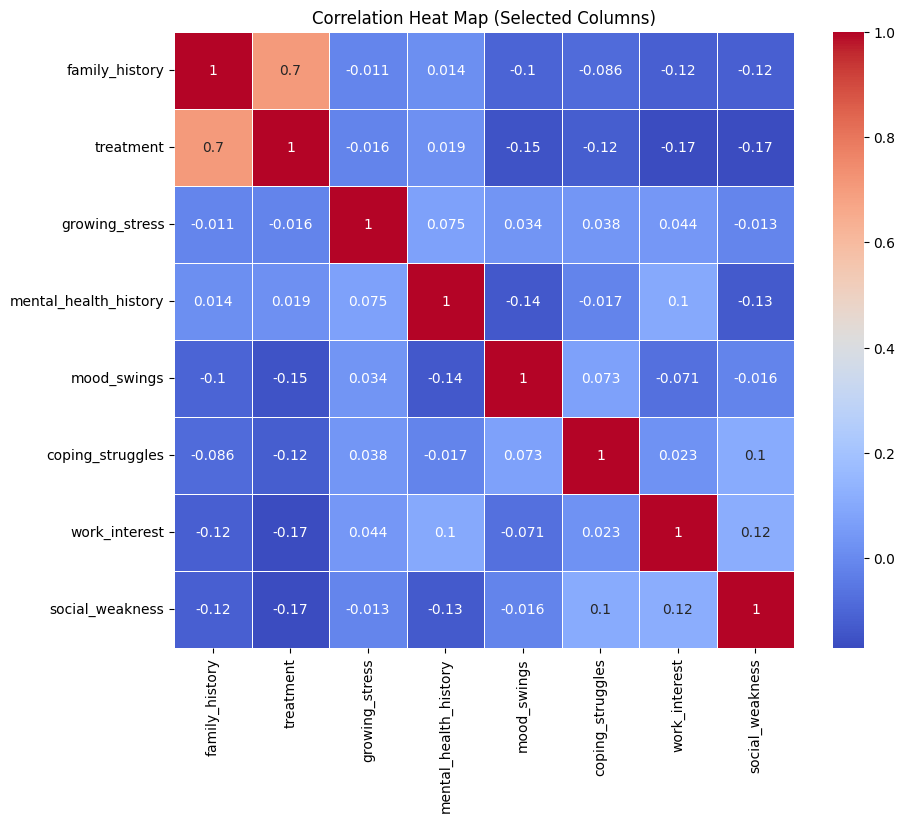

In [680]:
df_cor = top_10_percent_answers.copy()

# Remove non-numeric columns
df_cor = df_cor.select_dtypes(include=[float, int])

# Display the first few rows of the numeric DataFrame
print("Numeric DataFrame:")
print(df_cor.head())

# Calculate the correlation matrix
correlation_matrix = df_cor.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map (Selected Columns)')
plt.show()

### RESULTS of
### top 10 percent frame with manipulation and clean up

>Chi-Square Statistic: 12.748911 *and*
>p-value: 0.000356
>
># family history and treatment correlation
>
># 0.7



# Next Section
# top 50 percent of data
# vvv

In [681]:
top_50_percent_answers = rows_until_50.drop(columns=['percentage', 'count', 'cumulative_percentage'])

In [682]:
#look for correlation between variables
from itertools import combinations
from scipy.stats import chi2_contingency

# # Generate all pairs of variables
# variable_pairs = list(combinations(df_main.columns, 2))
# for var1, var2 in variable_pairs:
#     contingency_table = pd.crosstab(df_main[var1], df_main[var2])
#     print(f"Contingency Table for {var1} and {var2}:\n{contingency_table}\n")


# Generate all pairs of variables
variable_pairs = list(combinations(top_50_percent_answers.columns, 2))

# Perform Chi-Square test for each pair and store the results
chi_square_results = []

for var1, var2 in variable_pairs:
    contingency_table = pd.crosstab(top_50_percent_answers[var1], top_50_percent_answers[var2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi_square_results.append({'Variable Pair': f'{var1} - {var2}', 'Chi2': chi2, 'p-value': p})

# Convert results to DataFrame
chi_square_results_df = pd.DataFrame(chi_square_results)

# Sort by p-value
chi_square_results_df = chi_square_results_df.sort_values(by='p-value')


#save results to csv
#chi_square_results_df.to_csv('chi_square_results.csv')


#take top 100 results
chi_square_top_df = chi_square_results_df.head(100)

#sort by chi2
chi_square_sorted_df = chi_square_top_df.sort_values(by='Chi2', ascending=False)

# Display the results
chi_square_sorted_df.loc[9]

Variable Pair    family_history - treatment
Chi2                             586.648109
p-value                                 0.0
Name: 9, dtype: object

Numeric DataFrame:
      family_history  treatment  growing_stress  mental_health_history  \
1207              -1         -1               0                      0   
1744               1          1               0                      0   
2536              -1         -1              -1                      0   
663               -1         -1               1                      0   
2651              -1         -1               0                     -1   

      mood_swings  coping_struggles  work_interest  social_weakness  
1207           -1                -1             -1               -1  
1744           -1                -1             -1               -1  
2536           -1                -1              0                1  
663             1                -1             -1                0  
2651            0                 1              1               -1  

Correlation Matrix:
                       family_history  treatment  growing_stress  \
family_history             

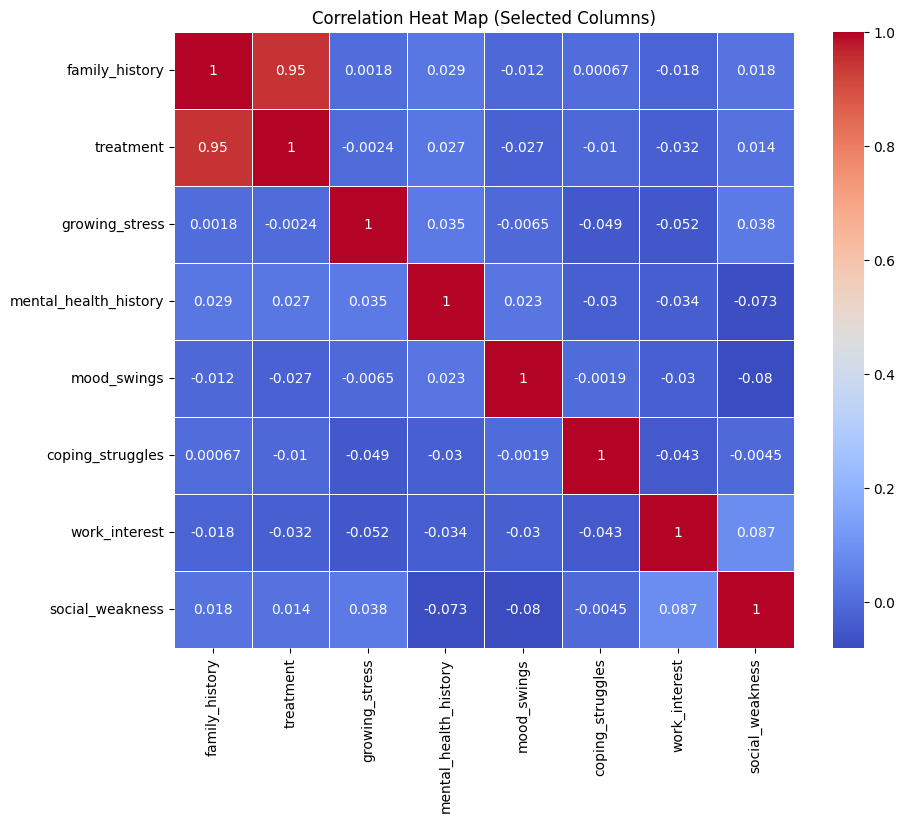

In [683]:
df_cor = top_50_percent_answers.copy()

# Remove non-numeric columns
df_cor = df_cor.select_dtypes(include=[float, int])

# Display the first few rows of the numeric DataFrame
print("Numeric DataFrame:")
print(df_cor.head())

# Calculate the correlation matrix
correlation_matrix = df_cor.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map (Selected Columns)')
plt.show()

### RESULTS of
### top 50 percent frame with manipulation and clean up

>Chi-Square Statistic: 586.648109 *and*
>p-value: 0.0
>
># family history and treatment correlation
>
># 0.95



# Next Section
# check bottom 50

Numeric DataFrame:
   family_history  treatment  growing_stress  mental_health_history  \
0               1          1              -1                      0   
1               1          1               0                     -1   
2               1          1               1                      0   
3               1          1               1                      1   
4               1          1              -1                      0   

   mood_swings  coping_struggles  work_interest  social_weakness  
0           -1                -1              0                1  
1           -1                -1              1                1  
2            0                -1             -1               -1  
3           -1                -1              0                0  
4            1                 1              0                1  

Correlation Matrix:
                       family_history  treatment  growing_stress  \
family_history               1.000000  -0.249071       -0.00497

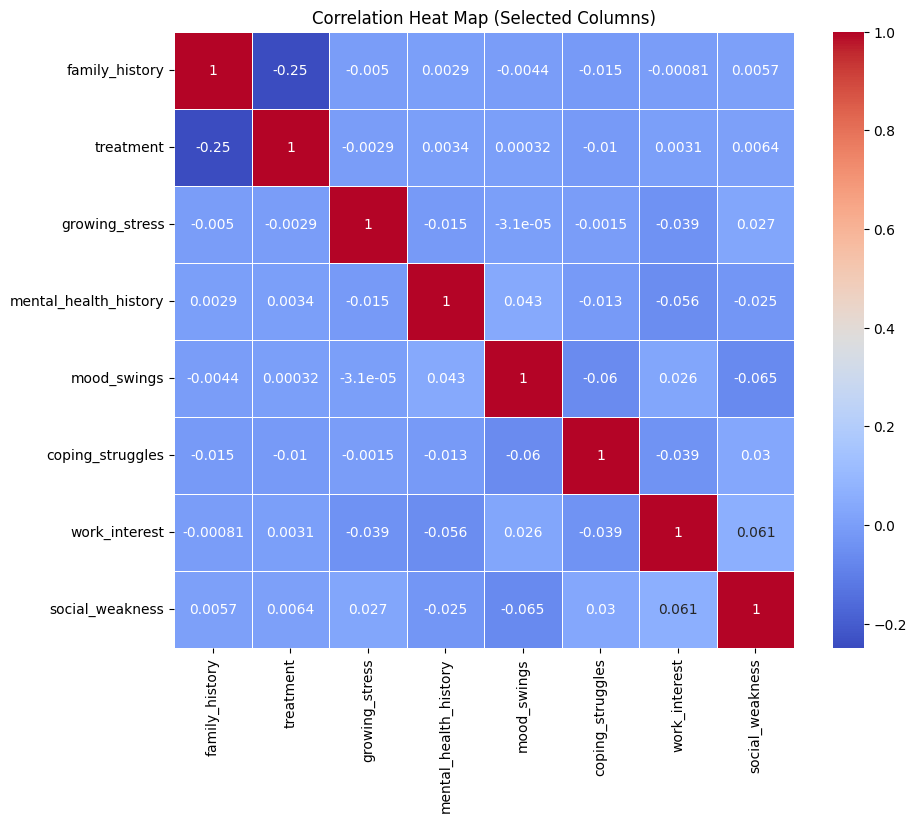

In [684]:
bottom_50_percent_answers = pd.read_csv('bottom_50_percent_answers.csv')

#remove percentage column
bottom_50_percent_answers = bottom_50_percent_answers.drop(columns=['percentage'])

df_cor = bottom_50_percent_answers.copy()

# Remove non-numeric columns
df_cor = df_cor.select_dtypes(include=[float, int])

# Display the first few rows of the numeric DataFrame
print("Numeric DataFrame:")
print(df_cor.head())

# Calculate the correlation matrix
correlation_matrix = df_cor.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map (Selected Columns)')
plt.show()

# conclusion

<h3>Shows that by creating a ranking system that is weighted by mental traits of the following columns

family_history	treatment	growing_stress	mental_health_history	mood_swings	coping_struggles	work_interest	social_weakness

the top most 50 percent of results shows a strong correlation between treatment and family history

while 

the bottom 50 percent show a very weak correlation.  This shows that the more random or unique set of answers of a subjects results are more likely to have no correlation between treatment and family history. 

But the top 50 percent of subjects that had answered similarly to their pairs showed they were also more likely to have answered in high correlation the same way for family history and treatment<h3>

In [685]:
df_cor.head()

,family_history,treatment,growing_stress,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness
0,1,1,-1,0,-1,-1,0,1
1,1,1,0,-1,-1,-1,1,1
2,1,1,1,0,0,-1,-1,-1
3,1,1,1,1,-1,-1,0,0
4,1,1,-1,0,1,1,0,1


In [686]:
df_mh_factors50 = top_50_percent_answers.copy()


#feature engineering

# Create the 'mental_health_severity' feature
df_mh_factors50['mental_health_severity'] = (top_50_percent_answers['mood_swings'] + 
                                           top_50_percent_answers['coping_struggles'] + 
                                           top_50_percent_answers['work_interest'] + 
                                           top_50_percent_answers['social_weakness'])

# Create the 'candidacy_rating' feature
df_mh_factors50['candidacy_rating'] = (top_50_percent_answers['family_history'] + 
                                     top_50_percent_answers['treatment'] + 
                                     top_50_percent_answers['growing_stress'] + 
                                     top_50_percent_answers['mental_health_history'])



# data sensitivity has increased

<ol>
  <li>Treatment top 50 percent</li>
  <li>Treatment all</li>
  <li>Family History top 50</li>
  <li>Family History all</li>
</ol>

<Axes: xlabel='mental_health_severity', ylabel='candidacy_rating'>

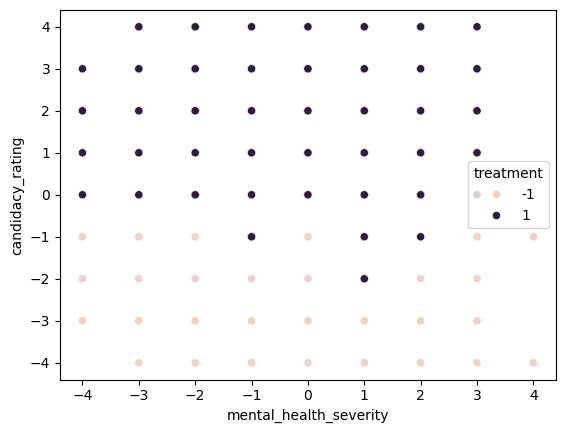

In [687]:
sns.scatterplot(data=df_mh_factors50, x="mental_health_severity", y="candidacy_rating", hue="treatment" )

<Axes: xlabel='mental_health_severity', ylabel='candidacy_rating'>

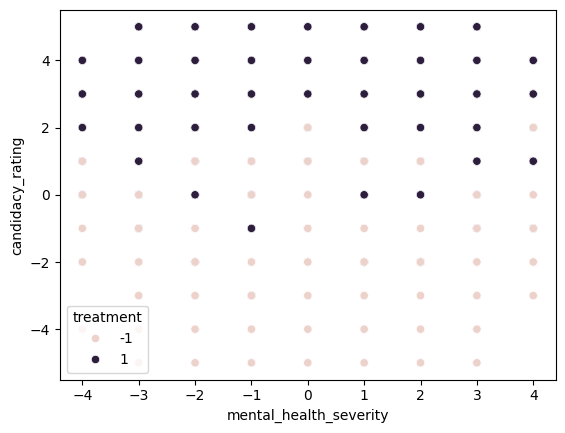

In [688]:
sns.scatterplot(data=data, x="mental_health_severity", y="candidacy_rating", hue="treatment" )

<Axes: xlabel='mental_health_severity', ylabel='candidacy_rating'>

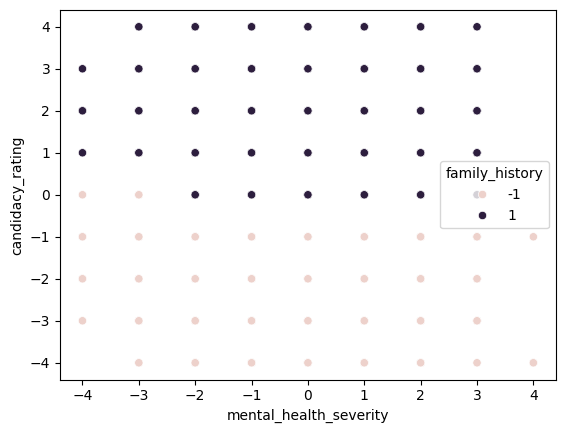

In [689]:
sns.scatterplot(data=df_mh_factors50, x="mental_health_severity", y="candidacy_rating", hue="family_history" )

<Axes: xlabel='mental_health_severity', ylabel='candidacy_rating'>

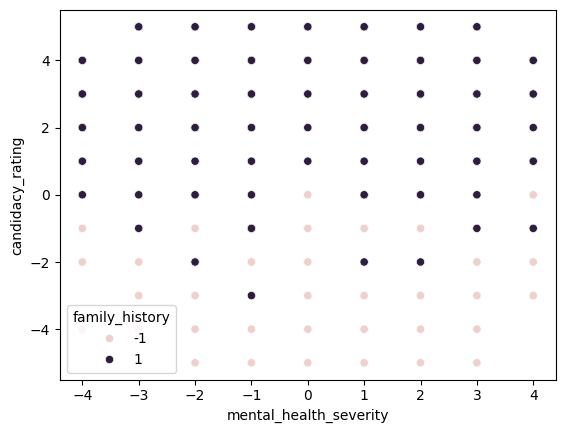

In [690]:
sns.scatterplot(data=data, x="mental_health_severity", y="candidacy_rating", hue="family_history" )